# GTZAN - Mahindra Final

`Music Genre Classification Problem`. Experts have been trying for a long time to understand sound & what differentiates one from another. How to visualize sound. What makes one tone different from another.

We are going to analyze the features extracted from the GTZAN dataset and build different type of ensemble models to see how better we can differentiate one genre from another.

Our Datasets contains 10 genres and 5 mahindra labels:-

* Family
    - Country
    - Jazz
* Relax
    - Blues
    - Classical
* Adventure
    - Hiphop
    - Metal
* Party
    - Pop
    - Disco
* Motivational
    - Reggae
    - Rock

# Reading & Understanding Data
## Importing Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
import librosa, IPython
import librosa.display as lplt
import os
seed = 12
np.random.seed(seed)

### Loading Dataset

In [50]:
df = pd.read_csv('../myelin_features.csv')
df

,Unnamed: 0,song_name,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,language
0,0,tamil_party107.mp3,0.407831,0.087155,0.167702,0.004421,2418.898912,5.563544e+05,2540.128971,127981.726508,...,-3.551132,35.412006,0.275856,36.043137,-3.381863,37.801735,1.193805,36.212055,party,tamil
1,1,tamil_party023.mp3,0.351305,0.095497,0.190441,0.005006,3040.014528,6.199500e+05,2870.652799,57835.949613,...,-4.079365,73.013930,7.840186,96.097910,-2.265710,98.682120,2.387404,80.299070,party,tamil
2,2,tamil_party024.mp3,0.441680,0.095543,0.240673,0.006739,2774.254539,6.500870e+05,2893.919362,93231.988850,...,-5.033821,74.718834,6.492497,128.294820,-1.132109,110.651660,3.458127,84.761570,party,tamil
3,3,tamil_party100.mp3,0.327399,0.085784,0.229396,0.017381,2504.464149,5.502731e+05,2563.089667,199414.447626,...,-2.672376,137.860210,8.456359,115.104380,4.172756,75.514366,4.313604,113.279160,party,tamil
4,4,tamil_party089.mp3,0.452618,0.092812,0.230101,0.011701,2859.910494,5.794944e+05,2687.218262,241383.006090,...,-6.588430,47.071537,2.697694,44.085526,-4.546928,50.769524,-0.129635,61.778430,party,tamil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6526,6526,marathi_family046.mp3,0.378616,0.096669,0.247369,0.017464,3154.927995,1.818043e+06,2896.503796,190853.953814,...,-4.653957,93.795900,2.736150,79.853710,-7.370616,71.178100,1.375233,59.927177,family,marathi
6527,6527,marathi_family097.mp3,0.357670,0.085115,0.190582,0.005264,1966.750312,2.938580e+05,2259.912302,103808.242143,...,-0.647311,120.166650,10.957766,136.159100,-2.067244,95.931920,10.508673,109.187690,family,marathi
6528,6528,marathi_family041.mp3,0.268056,0.092409,0.179540,0.002998,1926.126410,5.484509e+05,2337.176391,167084.141674,...,-2.964523,51.429882,5.638266,41.085842,-5.595038,58.654730,2.255686,63.406890,family,marathi
6529,6529,marathi_family090.mp3,0.333609,0.092712,0.180409,0.002762,1538.256307,4.970488e+05,1944.065447,251963.431828,...,6.798022,152.657910,10.279034,113.463104,2.837832,105.116970,11.396422,106.474120,family,marathi


### About the dataset

In [51]:
df.columns

Index(['Unnamed: 0', 'song_name', 'chroma_stft_mean', 'chroma_stft_var',
       'rms_mean', 'rms_var', 'spectral_centroid_mean',
       'spectral_centroid_var', 'spectral_bandwidth_mean',
       'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var',
       'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean',
       'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean',
       'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var',
       'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean',
       'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var',
       'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean',
       'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var',
       'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean',
       'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var',
       'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfc

In [52]:
############## MAPPING LOGIC ################
for i in range(len(df)):
    if df.iloc[i, -1] == "blues" or df.iloc[i, -1] == "classical":
        df["label"][i] = "relax"
#         print(df["label"][i])
    elif df.iloc[i, -1] == "country" or df.iloc[i, -1] == "jazz":
        df["label"][i] = "family"
#         print(df["label"][i])
    elif df.iloc[i, -1] == "hiphop" or df.iloc[i, -1] == "metal":
        df["label"][i] = "adventure"
#         print(df["label"][i])
    elif df.iloc[i, -1] == "pop" or df.iloc[i, -1] == "disco":
        df["label"][i] = "party"
#         print(df["label"][i])
    elif df.iloc[i, -1] == "reggae" or df.iloc[i, -1] == "rock":
        df["label"][i] = "motivational"
#         print(df["label"][i])

In [53]:
print("Dataset has",df.shape)
print("Count of Positive and Negative samples")
df.language.value_counts().reset_index()

Dataset has (6531, 61)
Count of Positive and Negative samples


,index,language
0,english,1232
1,hindi,1203
2,bengali,894
3,tamil,768
4,malayalam,653
5,kannada,636
6,telugu,622
7,marathi,523


# Data Visualization

In [54]:
# audio_fp = '../Data/genres_original/blues/blues.00055.wav'
# audio_data, sr = librosa.load(audio_fp)
# audio_data, _ = librosa.effects.trim(audio_data)

In [55]:
# play sample file
# IPython.display.Audio(audio_data, rate=sr)

In [56]:
# # plot sample file
# plt.figure(figsize=(15,5))
# lplt.waveplot(audio_data)
# plt.show()

In [57]:
# # Default FFT window size
# n_fft = 2048 # window size
# hop_length = 512 # window hop length for STFT

# stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
# stft_db = librosa.amplitude_to_db(stft, ref=np.max)

# plt.figure(figsize=(12,4))
# lplt.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
# plt.colorbar()
# plt.title("Spectrogram with amplitude")
# plt.show()

# plt.figure(figsize=(12,4))
# plt.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
# plt.colorbar()
# plt.title("Spectrogram with decibel log")
# plt.show()

In [58]:
# # plot zoomed audio wave 
# start = 1000
# end = 1200
# plt.figure(figsize=(16,4))
# plt.plot(audio_data[start:end])
# plt.show()

In [59]:
# mel_spec = librosa.feature.melspectrogram(audio_data, sr=sr)
# mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
# plt.figure(figsize=(16,6))
# lplt.specshow(mel_spec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')
# plt.colorbar()
# plt.title("Mel Spectrogram")
# plt.show()

In [60]:
# chroma = librosa.feature.chroma_stft(audio_data, sr=sr)
# plt.figure(figsize=(16,6))
# lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
# plt.colorbar()
# plt.title("Chroma Features")
# plt.show()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0, 0.5, 'chroma_stft_mean'),
  Text(0, 1.5, 'rms_mean'),
  Text(0, 2.5, 'spectral_centroid_mean'),
  Text(0, 3.5, 'spectral_bandwidth_mean'),
  Text(0, 4.5, 'rolloff_mean'),
  Text(0, 5.5, 'zero_crossing_rate_mean'),
  Text(0, 6.5, 'harmony_mean'),
  Text(0, 7.5, 'perceptr_mean'),
  Text(0, 8.5, 'mfcc1_mean'),
  Text(0, 9.5, 'mfcc2_mean'),
  Text(0, 10.5, 'mfcc3_mean'),
  Text(0, 11.5, 'mfcc4_mean'),
  Text(0, 12.5, 'mfcc5_mean'),
  Text(0, 13.5, 'mfcc6_mean'),
  Text(0, 14.5, 'mfcc7_mean'),
  Text(0, 15.5, 'mfcc8_mean'),
  Text(0, 16.5, 'mfcc9_mean'),
  Text(0, 17.5, 'mfcc10_mean'),
  Text(0, 18.5, 'mfcc11_mean'),
  Text(0, 19.5, 'mfcc12_mean'),
  Text(0, 20.5, 'mfcc13_mean'),
  Text(0, 21.5, 'mfcc14_mean'),
  Text(0, 22.5, 'mfcc15_mean'),
  Text(0, 23.5, 'mfcc16_mean'),
  Text(0, 24.5, 

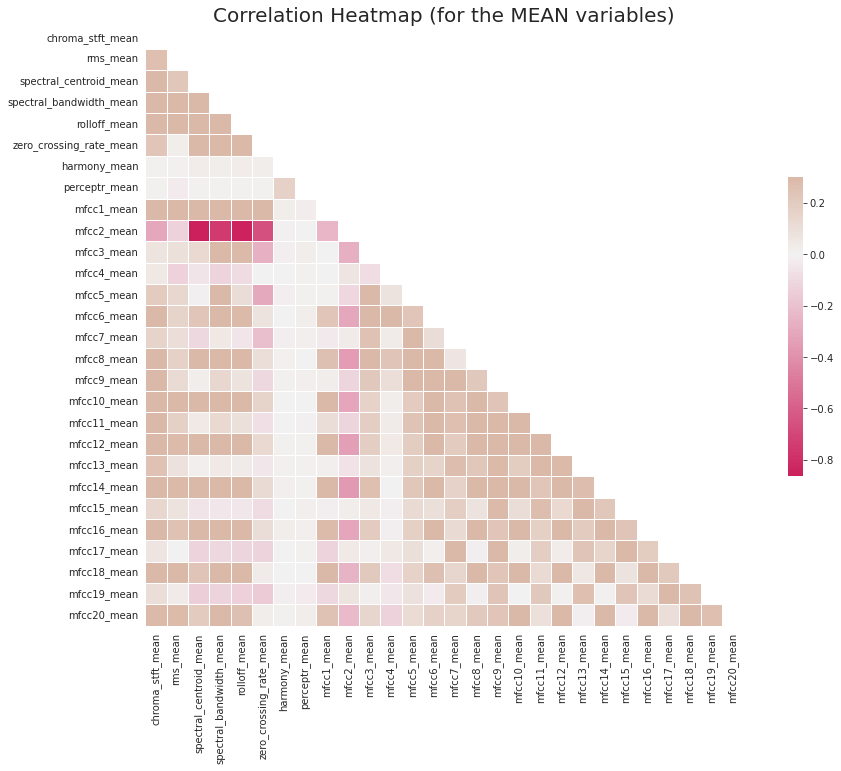

In [61]:
# Computing the Correlation Matrix
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

Text(0, 0.5, 'BPM')

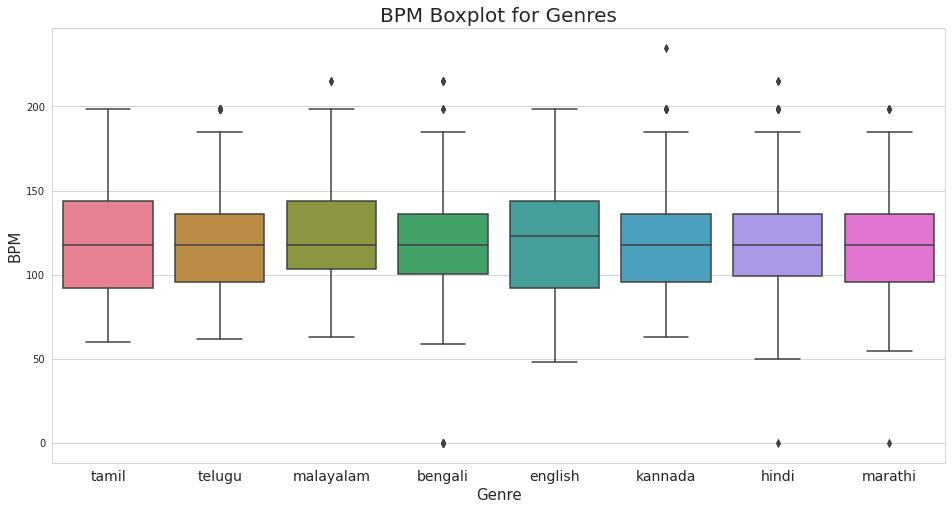

In [62]:
x = df[["language", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "language", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)

Text(0, 0.5, 'Principal Component 2')

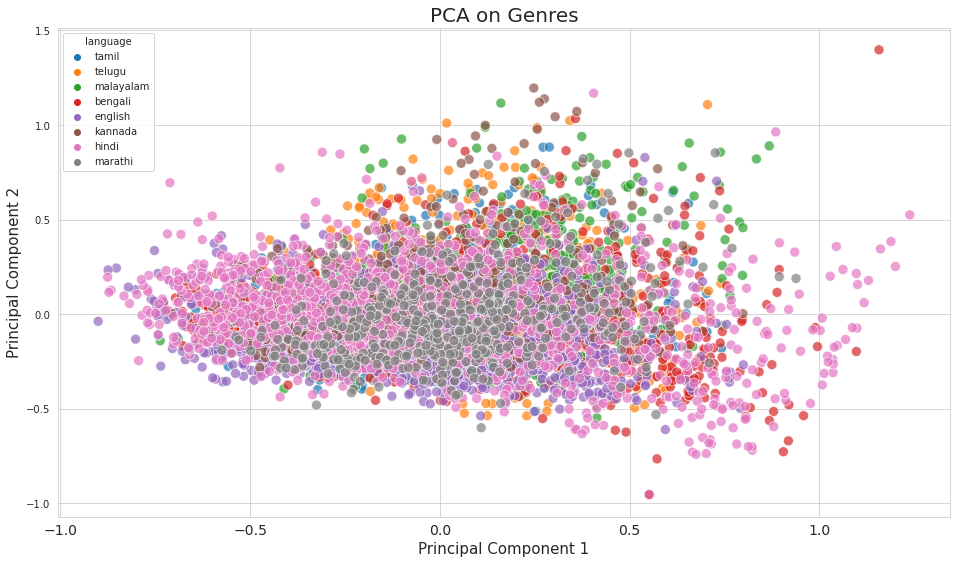

In [63]:
data = df.iloc[0:, 1:]
y = data['language']
X = data.iloc[:, 1:-2]

#normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "language", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)

# Data Preparation

- Treat missing values.
- Outlier Treatment
- Define dummy variables for categorical variables.

## Missing Value Treatment

In [64]:
# find all columns with any NA values
print("Columns with NA values are",list(df.columns[df.isnull().any()]))

Columns with NA values are []


`No null values in the dataset`



`There are no categorical variable as such. Hence, Dummy variable creation is not needed.`

## Encode Genre Label

In [65]:
# map labels to index
label_index = dict()
index_label = dict()
##################################################################
for i, x in enumerate(df.language.unique()):
    label_index[x] = i
    index_label[i] = x
print(label_index)
print(index_label)

{'tamil': 0, 'telugu': 1, 'malayalam': 2, 'bengali': 3, 'english': 4, 'kannada': 5, 'hindi': 6, 'marathi': 7}
{0: 'tamil', 1: 'telugu', 2: 'malayalam', 3: 'bengali', 4: 'english', 5: 'kannada', 6: 'hindi', 7: 'marathi'}


In [66]:
# update labels in df to index
df.language = [label_index[l] for l in df.language]

# Split Train, Dev & Test Sets

In [67]:
# shuffle samples
df_shuffle = df.sample(frac=1, random_state=seed).reset_index(drop=True)

In [68]:
df_shuffle

,Unnamed: 0,song_name,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,language
0,602,tamil_relax124.mp3,0.260331,0.085794,0.257891,0.003352,2327.288310,316034.772088,2484.028487,90102.852915,...,-5.415373,94.720780,-0.190057,81.437840,-7.897176,76.291340,-0.086671,113.448120,relax,0
1,5497,hindi_adventure090.mp3,0.456733,0.086322,0.240407,0.010020,2803.349300,582212.234345,2653.788704,163141.648618,...,-4.655736,60.763560,7.863175,64.562195,-0.634369,54.910950,11.817035,78.189010,adventure,6
2,290,tamil_adventure099.mp3,0.346673,0.084018,0.239971,0.004152,2479.182114,236862.556733,2718.804122,64062.899007,...,-5.235490,63.557022,0.680963,41.208965,-8.704568,57.789270,-0.686372,66.995575,adventure,0
3,1099,telugu_motivational156.mp3,0.395734,0.088662,0.165918,0.004106,2894.613754,663688.807675,2758.251288,80632.689989,...,-4.348892,43.538628,1.453314,37.121506,-6.227324,46.038680,0.248024,68.650986,motivational,1
4,1743,malayalam_adventure066.mp3,0.416859,0.080611,0.157734,0.002879,2755.748879,308731.345753,2963.771121,47959.199539,...,-2.403758,36.728844,3.793728,40.757430,-1.314179,48.041817,1.738776,36.129166,adventure,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6526,3714,english_relax098.mp3,0.330458,0.083980,0.070654,0.000617,1617.241936,206232.086163,2022.866090,159377.065062,...,-8.349803,68.315260,3.693350,71.152054,-1.470519,53.764744,4.010430,41.170166,relax,4
6527,3325,english_motivational217.mp3,0.514912,0.076861,0.269126,0.004972,2255.696589,475464.050770,2540.378805,177221.333006,...,-8.053847,38.391090,5.736175,38.457798,-5.642301,40.559120,5.778156,48.353620,motivational,4
6528,1414,malayalam_party162.mp3,0.357907,0.091050,0.142572,0.001988,2416.081961,334107.871984,2429.590254,86025.991919,...,-4.968359,68.754776,6.461238,67.221940,-5.595064,86.254230,-8.802611,71.365340,party,2
6529,5787,hindi_relax051.mp3,0.269846,0.092153,0.233546,0.007849,1710.155096,360859.559783,2158.223847,188205.802677,...,-8.720984,61.888725,4.924609,78.728294,-14.130875,96.944060,-3.268179,71.632550,relax,6


In [69]:
# remove irrelevant columns
df_shuffle

# df_shuffle.drop(['filename', 'length'], axis=1, inplace=True)
###################################################################
df_y = df_shuffle.pop('language')
df_X = df_shuffle.iloc[:,2:-1]


# split into train dev and test
X_train, df_test_valid_X, y_train, df_test_valid_y = skms.train_test_split(df_X, df_y, train_size=0.7, random_state=seed, stratify=df_y)
X_dev, X_test, y_dev, y_test = skms.train_test_split(df_test_valid_X, df_test_valid_y, train_size=0.66, random_state=seed, stratify=df_test_valid_y)

In [70]:
print(f"Train set has {X_train.shape[0]} records out of {len(df_shuffle)} which is {round(X_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Dev set has {X_dev.shape[0]} records out of {len(df_shuffle)} which is {round(X_dev.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df_shuffle)} which is {round(X_test.shape[0]/len(df_shuffle)*100)}%")

Train set has 4571 records out of 6531 which is 70%
Dev set has 1293 records out of 6531 which is 20%
Test set has 667 records out of 6531 which is 10%


In [71]:
print(y_train.value_counts()[0]/y_train.shape[0]*100)
print(y_dev.value_counts()[0]/y_dev.shape[0]*100)
print(y_test.value_counts()[0]/y_test.shape[0]*100)

11.769853423758478
11.755607115235886
11.694152923538232


## Scale the Features - Need to do to incoming new data as well.

In [72]:
scaler = skp.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_dev = pd.DataFrame(scaler.transform(X_dev), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Model Building

In [73]:
import tensorflow as tf
print("TF version:-", tf.__version__)
import keras as k
tf.random.set_seed(seed)

TF version:- 2.9.1


In [74]:
ACCURACY_THRESHOLD = 0.94

class myCallback(k.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True

def trainModel(model, epochs, optimizer):
    batch_size = 128
    callback = myCallback()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy'
    )
    return model.fit(X_train, y_train, validation_data=(X_dev, y_dev), epochs=epochs, 
                     batch_size=batch_size, callbacks=[callback])

def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()


In [75]:
print(X_train.head())

   chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0          1.014375        -1.029617  0.534100 -0.933968   
1          2.235913        -2.345786  0.539532 -0.227780   
2         -0.231351         0.421698 -0.413522 -0.586494   
3         -0.807138        -0.345246 -0.285577 -0.751857   
4         -1.656485         0.860922  0.195994 -0.334322   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0               -0.326183               0.689300                 0.299177   
1                0.037789              -0.069620                 0.237499   
2                0.248010              -0.476246                 0.702095   
3               -0.305262              -0.863594                 0.329531   
4               -0.250810              -0.451071                 0.557673   

   spectral_bandwidth_var  rolloff_mean  rolloff_var  ...  mfcc16_mean  \
0                0.725132     -0.187388     1.447311  ...     0.384681   
1                0.220154   

In [76]:
model_1 = k.models.Sequential([
    k.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dense(5, activation='softmax'),
])
print(model_1.summary())
model_1_history = trainModel(model=model_1, epochs=70, optimizer='adam')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               14848     
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 5)                 325       
                                                                 
Total params: 56,325
Trainable params: 56,325
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/70


2022-07-08 10:36:53.663908: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at sparse_xent_op.cc:102 : INVALID_ARGUMENT: Received a label value of 7 which is outside the valid range of [0, 5).  Label values: 2 0 4 4 1 2 1 1 6 5 7 1 6 4 1 0 4 4 3 4 0 4 3 4 0 0 0 2 7 6 0 1 5 4 3 0 2 3 3 5 1 7 0 4 5 1 7 2 1 3 2 2 0 6 1 2 1 5 4 4 1 6 3 0 2 1 5 7 5 1 7 4 6 1 5 0 6 4 1 2 6 7 2 3 6 0 4 6 4 7 2 6 3 2 1 6 7 0 1 0 6 7 1 6 7 6 4 6 7 3 6 5 0 5 1 4 1 6 6 2 6 0 1 6 4 4 0 4


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
      await result
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_50846/3382649010.py", line 8, in <cell line: 8>
      model_1_history = trainModel(model=model_1, epochs=70, optimizer='adam')
    File "/tmp/ipykernel_50846/2539567043.py", line 16, in trainModel
      return model.fit(X_train, y_train, validation_data=(X_dev, y_dev), epochs=epochs,
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/keras/engine/training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/keras/engine/training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/keras/losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/keras/losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/keras/losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/home/shrey_intern/anaconda3/envs/env_full/lib/python3.8/site-packages/keras/backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 7 which is outside the valid range of [0, 5).  Label values: 2 0 4 4 1 2 1 1 6 5 7 1 6 4 1 0 4 4 3 4 0 4 3 4 0 0 0 2 7 6 0 1 5 4 3 0 2 3 3 5 1 7 0 4 5 1 7 2 1 3 2 2 0 6 1 2 1 5 4 4 1 6 3 0 2 1 5 7 5 1 7 4 6 1 5 0 6 4 1 2 6 7 2 3 6 0 4 6 4 7 2 6 3 2 1 6 7 0 1 0 6 7 1 6 7 6 4 6 7 3 6 5 0 5 1 4 1 6 6 2 6 0 1 6 4 4 0 4
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_145981]

Max. Validation Accuracy 0.7703016400337219


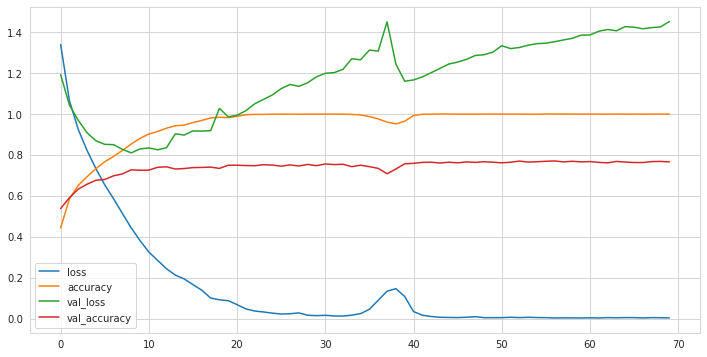

In [133]:
plotHistory(model_1_history)

In [134]:
model_2 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(5, activation='softmax'),
])
print(model_2.summary())
model_2_history = trainModel(model=model_2, epochs=100, optimizer='adam')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               29696     
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 64)               

Max. Validation Accuracy 0.8120649456977844


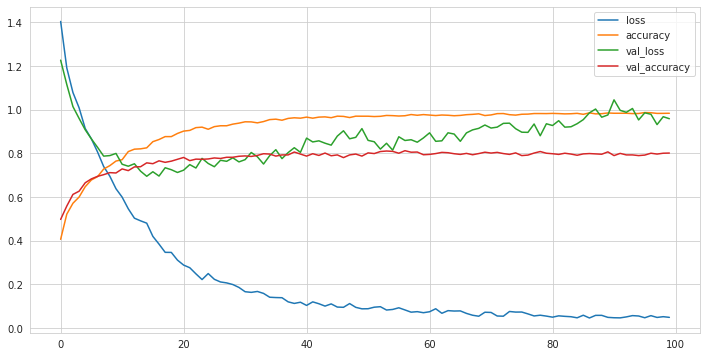

In [135]:
plotHistory(model_2_history)

In [77]:
model_3 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(8, activation='softmax'),
])
print(model_3.summary())
model_3_history = trainModel(model=model_3, epochs=700, optimizer='sgd')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 512)               29696     
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               131328    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 64)               

36/36 [==============================] - 0s 4ms/step - loss: 1.1528 - accuracy: 0.5386 - val_loss: 1.1059 - val_accuracy: 0.5507
Epoch 48/700
36/36 [==============================] - 0s 4ms/step - loss: 1.1341 - accuracy: 0.5535 - val_loss: 1.1016 - val_accuracy: 0.5483
Epoch 49/700
36/36 [==============================] - 0s 4ms/step - loss: 1.1442 - accuracy: 0.5329 - val_loss: 1.0972 - val_accuracy: 0.5483
Epoch 50/700
36/36 [==============================] - 0s 4ms/step - loss: 1.1365 - accuracy: 0.5482 - val_loss: 1.0911 - val_accuracy: 0.5545
Epoch 51/700
36/36 [==============================] - 0s 4ms/step - loss: 1.1240 - accuracy: 0.5581 - val_loss: 1.0862 - val_accuracy: 0.5561
Epoch 52/700
36/36 [==============================] - 0s 4ms/step - loss: 1.1047 - accuracy: 0.5614 - val_loss: 1.0814 - val_accuracy: 0.5553
Epoch 53/700
36/36 [==============================] - 0s 4ms/step - loss: 1.1111 - accuracy: 0.5559 - val_loss: 1.0762 - val_accuracy: 0.5646
Epoch 54/700
36/36 

Epoch 105/700
36/36 [==============================] - 0s 4ms/step - loss: 0.8910 - accuracy: 0.6432 - val_loss: 0.9404 - val_accuracy: 0.6210
Epoch 106/700
36/36 [==============================] - 0s 4ms/step - loss: 0.8648 - accuracy: 0.6592 - val_loss: 0.9376 - val_accuracy: 0.6249
Epoch 107/700
36/36 [==============================] - 0s 4ms/step - loss: 0.8686 - accuracy: 0.6653 - val_loss: 0.9333 - val_accuracy: 0.6319
Epoch 108/700
36/36 [==============================] - 0s 4ms/step - loss: 0.8763 - accuracy: 0.6565 - val_loss: 0.9305 - val_accuracy: 0.6381
Epoch 109/700
36/36 [==============================] - 0s 4ms/step - loss: 0.8746 - accuracy: 0.6622 - val_loss: 0.9315 - val_accuracy: 0.6334
Epoch 110/700
36/36 [==============================] - 0s 4ms/step - loss: 0.8454 - accuracy: 0.6662 - val_loss: 0.9289 - val_accuracy: 0.6342
Epoch 111/700
36/36 [==============================] - 0s 4ms/step - loss: 0.8625 - accuracy: 0.6585 - val_loss: 0.9285 - val_accuracy: 0.6342

36/36 [==============================] - 0s 4ms/step - loss: 0.6857 - accuracy: 0.7338 - val_loss: 0.8528 - val_accuracy: 0.6883
Epoch 163/700
36/36 [==============================] - 0s 4ms/step - loss: 0.6804 - accuracy: 0.7366 - val_loss: 0.8494 - val_accuracy: 0.6883
Epoch 164/700
36/36 [==============================] - 0s 4ms/step - loss: 0.6781 - accuracy: 0.7423 - val_loss: 0.8466 - val_accuracy: 0.6899
Epoch 165/700
36/36 [==============================] - 0s 4ms/step - loss: 0.6804 - accuracy: 0.7401 - val_loss: 0.8467 - val_accuracy: 0.6937
Epoch 166/700
36/36 [==============================] - 0s 4ms/step - loss: 0.6819 - accuracy: 0.7403 - val_loss: 0.8473 - val_accuracy: 0.6875
Epoch 167/700
36/36 [==============================] - 0s 4ms/step - loss: 0.6705 - accuracy: 0.7427 - val_loss: 0.8439 - val_accuracy: 0.6883
Epoch 168/700
36/36 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.7405 - val_loss: 0.8461 - val_accuracy: 0.6845
Epoch 169/700

36/36 [==============================] - 0s 4ms/step - loss: 0.5399 - accuracy: 0.8022 - val_loss: 0.8038 - val_accuracy: 0.7270
Epoch 220/700
36/36 [==============================] - 0s 4ms/step - loss: 0.5407 - accuracy: 0.7926 - val_loss: 0.8024 - val_accuracy: 0.7231
Epoch 221/700
36/36 [==============================] - 0s 4ms/step - loss: 0.5536 - accuracy: 0.7930 - val_loss: 0.8084 - val_accuracy: 0.7239
Epoch 222/700
36/36 [==============================] - 0s 4ms/step - loss: 0.5380 - accuracy: 0.8055 - val_loss: 0.8115 - val_accuracy: 0.7200
Epoch 223/700
36/36 [==============================] - 0s 4ms/step - loss: 0.5315 - accuracy: 0.7998 - val_loss: 0.8058 - val_accuracy: 0.7285
Epoch 224/700
36/36 [==============================] - 0s 4ms/step - loss: 0.5348 - accuracy: 0.8040 - val_loss: 0.8007 - val_accuracy: 0.7239
Epoch 225/700
36/36 [==============================] - 0s 4ms/step - loss: 0.5148 - accuracy: 0.8077 - val_loss: 0.8038 - val_accuracy: 0.7278
Epoch 226/700

36/36 [==============================] - 0s 4ms/step - loss: 0.4066 - accuracy: 0.8582 - val_loss: 0.7824 - val_accuracy: 0.7448
Epoch 277/700
36/36 [==============================] - 0s 4ms/step - loss: 0.4263 - accuracy: 0.8394 - val_loss: 0.7748 - val_accuracy: 0.7486
Epoch 278/700
36/36 [==============================] - 0s 4ms/step - loss: 0.4000 - accuracy: 0.8589 - val_loss: 0.7868 - val_accuracy: 0.7456
Epoch 279/700
36/36 [==============================] - 0s 4ms/step - loss: 0.4131 - accuracy: 0.8486 - val_loss: 0.7827 - val_accuracy: 0.7502
Epoch 280/700
36/36 [==============================] - 0s 4ms/step - loss: 0.4161 - accuracy: 0.8453 - val_loss: 0.7828 - val_accuracy: 0.7541
Epoch 281/700
36/36 [==============================] - 0s 4ms/step - loss: 0.4039 - accuracy: 0.8598 - val_loss: 0.7853 - val_accuracy: 0.7471
Epoch 282/700
36/36 [==============================] - 0s 4ms/step - loss: 0.4036 - accuracy: 0.8515 - val_loss: 0.7855 - val_accuracy: 0.7432
Epoch 283/700

36/36 [==============================] - 0s 4ms/step - loss: 0.3212 - accuracy: 0.8851 - val_loss: 0.7862 - val_accuracy: 0.7641
Epoch 334/700
36/36 [==============================] - 0s 4ms/step - loss: 0.3257 - accuracy: 0.8882 - val_loss: 0.7844 - val_accuracy: 0.7626
Epoch 335/700
36/36 [==============================] - 0s 5ms/step - loss: 0.3244 - accuracy: 0.8884 - val_loss: 0.7755 - val_accuracy: 0.7695
Epoch 336/700
36/36 [==============================] - 0s 5ms/step - loss: 0.3171 - accuracy: 0.8830 - val_loss: 0.7801 - val_accuracy: 0.7680
Epoch 337/700
36/36 [==============================] - 0s 5ms/step - loss: 0.3289 - accuracy: 0.8821 - val_loss: 0.7834 - val_accuracy: 0.7641
Epoch 338/700
36/36 [==============================] - 0s 4ms/step - loss: 0.3054 - accuracy: 0.8939 - val_loss: 0.7839 - val_accuracy: 0.7657
Epoch 339/700
36/36 [==============================] - 0s 4ms/step - loss: 0.3275 - accuracy: 0.8832 - val_loss: 0.7812 - val_accuracy: 0.7595
Epoch 340/700

36/36 [==============================] - 0s 4ms/step - loss: 0.2521 - accuracy: 0.9156 - val_loss: 0.7945 - val_accuracy: 0.7749
Epoch 391/700
36/36 [==============================] - 0s 4ms/step - loss: 0.2393 - accuracy: 0.9169 - val_loss: 0.7985 - val_accuracy: 0.7672
Epoch 392/700
36/36 [==============================] - 0s 4ms/step - loss: 0.2457 - accuracy: 0.9136 - val_loss: 0.8007 - val_accuracy: 0.7718
Epoch 393/700
36/36 [==============================] - 0s 4ms/step - loss: 0.2527 - accuracy: 0.9127 - val_loss: 0.7991 - val_accuracy: 0.7688
Epoch 394/700
36/36 [==============================] - 0s 4ms/step - loss: 0.2504 - accuracy: 0.9138 - val_loss: 0.8012 - val_accuracy: 0.7703
Epoch 395/700
36/36 [==============================] - 0s 4ms/step - loss: 0.2487 - accuracy: 0.9129 - val_loss: 0.7951 - val_accuracy: 0.7711
Epoch 396/700
36/36 [==============================] - 0s 4ms/step - loss: 0.2336 - accuracy: 0.9142 - val_loss: 0.7990 - val_accuracy: 0.7711
Epoch 397/700

36/36 [==============================] - 0s 4ms/step - loss: 0.1882 - accuracy: 0.9333 - val_loss: 0.8193 - val_accuracy: 0.7742
Epoch 448/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1910 - accuracy: 0.9331 - val_loss: 0.8197 - val_accuracy: 0.7765
Epoch 449/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1871 - accuracy: 0.9348 - val_loss: 0.8202 - val_accuracy: 0.7726
Epoch 450/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1939 - accuracy: 0.9311 - val_loss: 0.8156 - val_accuracy: 0.7765
Epoch 451/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1866 - accuracy: 0.9379 - val_loss: 0.8148 - val_accuracy: 0.7695
Epoch 452/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1802 - accuracy: 0.9387 - val_loss: 0.8208 - val_accuracy: 0.7734
Epoch 453/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1845 - accuracy: 0.9339 - val_loss: 0.8239 - val_accuracy: 0.7757
Epoch 454/700

36/36 [==============================] - 0s 4ms/step - loss: 0.1486 - accuracy: 0.9488 - val_loss: 0.8396 - val_accuracy: 0.7819
Epoch 505/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1508 - accuracy: 0.9521 - val_loss: 0.8510 - val_accuracy: 0.7773
Epoch 506/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1406 - accuracy: 0.9536 - val_loss: 0.8499 - val_accuracy: 0.7757
Epoch 507/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1422 - accuracy: 0.9538 - val_loss: 0.8442 - val_accuracy: 0.7780
Epoch 508/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1414 - accuracy: 0.9532 - val_loss: 0.8476 - val_accuracy: 0.7788
Epoch 509/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1339 - accuracy: 0.9547 - val_loss: 0.8558 - val_accuracy: 0.7796
Epoch 510/700
36/36 [==============================] - 0s 6ms/step - loss: 0.1489 - accuracy: 0.9536 - val_loss: 0.8525 - val_accuracy: 0.7811
Epoch 511/700

36/36 [==============================] - 0s 4ms/step - loss: 0.1208 - accuracy: 0.9582 - val_loss: 0.8542 - val_accuracy: 0.7842
Epoch 562/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1129 - accuracy: 0.9635 - val_loss: 0.8581 - val_accuracy: 0.7788
Epoch 563/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1235 - accuracy: 0.9606 - val_loss: 0.8612 - val_accuracy: 0.7834
Epoch 564/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1172 - accuracy: 0.9608 - val_loss: 0.8618 - val_accuracy: 0.7842
Epoch 565/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1125 - accuracy: 0.9608 - val_loss: 0.8614 - val_accuracy: 0.7788
Epoch 566/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1118 - accuracy: 0.9628 - val_loss: 0.8717 - val_accuracy: 0.7827
Epoch 567/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1257 - accuracy: 0.9556 - val_loss: 0.8598 - val_accuracy: 0.7881
Epoch 568/700

36/36 [==============================] - 0s 4ms/step - loss: 0.0991 - accuracy: 0.9685 - val_loss: 0.9009 - val_accuracy: 0.7827
Epoch 619/700
36/36 [==============================] - 0s 4ms/step - loss: 0.0917 - accuracy: 0.9716 - val_loss: 0.8978 - val_accuracy: 0.7873
Epoch 620/700
36/36 [==============================] - 0s 3ms/step - loss: 0.1004 - accuracy: 0.9672 - val_loss: 0.8885 - val_accuracy: 0.7881
Epoch 621/700
36/36 [==============================] - 0s 4ms/step - loss: 0.0947 - accuracy: 0.9696 - val_loss: 0.8971 - val_accuracy: 0.7865
Epoch 622/700
36/36 [==============================] - 0s 3ms/step - loss: 0.0963 - accuracy: 0.9681 - val_loss: 0.8899 - val_accuracy: 0.7912
Epoch 623/700
36/36 [==============================] - 0s 4ms/step - loss: 0.1015 - accuracy: 0.9667 - val_loss: 0.8863 - val_accuracy: 0.7920
Epoch 624/700
36/36 [==============================] - 0s 3ms/step - loss: 0.0877 - accuracy: 0.9722 - val_loss: 0.8885 - val_accuracy: 0.7858
Epoch 625/700

36/36 [==============================] - 0s 4ms/step - loss: 0.0853 - accuracy: 0.9722 - val_loss: 0.9063 - val_accuracy: 0.7920
Epoch 676/700
36/36 [==============================] - 0s 4ms/step - loss: 0.0774 - accuracy: 0.9746 - val_loss: 0.9163 - val_accuracy: 0.7958
Epoch 677/700
36/36 [==============================] - 0s 4ms/step - loss: 0.0808 - accuracy: 0.9751 - val_loss: 0.9209 - val_accuracy: 0.7927
Epoch 678/700
36/36 [==============================] - 0s 4ms/step - loss: 0.0892 - accuracy: 0.9718 - val_loss: 0.9183 - val_accuracy: 0.7951
Epoch 679/700
36/36 [==============================] - 0s 4ms/step - loss: 0.0829 - accuracy: 0.9755 - val_loss: 0.9155 - val_accuracy: 0.7943
Epoch 680/700
36/36 [==============================] - 0s 4ms/step - loss: 0.0771 - accuracy: 0.9753 - val_loss: 0.9179 - val_accuracy: 0.7920
Epoch 681/700
36/36 [==============================] - 0s 4ms/step - loss: 0.0920 - accuracy: 0.9692 - val_loss: 0.9207 - val_accuracy: 0.7904
Epoch 682/700

Max. Validation Accuracy 0.8012374043464661


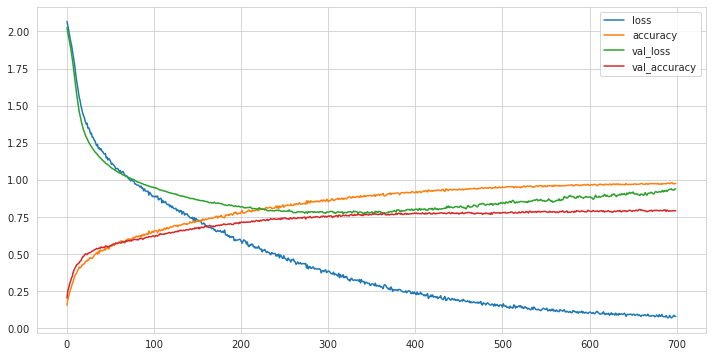

In [78]:
plotHistory(model_3_history)

In [79]:
print(X_train.shape[1])

57


In [139]:
model_4 = k.models.Sequential([
    k.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.3),
    
    k.layers.Dense(512, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(5, activation='softmax'),
])
print(model_4.summary())
model_4_history = trainModel(model=model_4, epochs=500, optimizer='rmsprop')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 1024)              59392     
                                                                 
 dropout_21 (Dropout)        (None, 1024)              0         
                                                                 
 dense_35 (Dense)            (None, 512)               524800    
                                                                 
 dropout_22 (Dropout)        (None, 512)               0         
                                                                 
 dense_36 (Dense)            (None, 256)               131328    
                                                                 
 dropout_23 (Dropout)        (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 128)              

36/36 [==============================] - 0s 11ms/step - loss: 0.0747 - accuracy: 0.9797 - val_loss: 1.3373 - val_accuracy: 0.8059
Epoch 103/500
36/36 [==============================] - 0s 11ms/step - loss: 0.0653 - accuracy: 0.9856 - val_loss: 1.4368 - val_accuracy: 0.7935
Epoch 104/500
36/36 [==============================] - 0s 11ms/step - loss: 0.0673 - accuracy: 0.9823 - val_loss: 1.3577 - val_accuracy: 0.7927
Epoch 105/500
36/36 [==============================] - 0s 11ms/step - loss: 0.0667 - accuracy: 0.9788 - val_loss: 1.3229 - val_accuracy: 0.7912
Epoch 106/500
36/36 [==============================] - 0s 11ms/step - loss: 0.0574 - accuracy: 0.9827 - val_loss: 1.3735 - val_accuracy: 0.7881
Epoch 107/500
36/36 [==============================] - 0s 11ms/step - loss: 0.0657 - accuracy: 0.9807 - val_loss: 1.4010 - val_accuracy: 0.8074
Epoch 108/500
36/36 [==============================] - 0s 11ms/step - loss: 0.0629 - accuracy: 0.9838 - val_loss: 1.3382 - val_accuracy: 0.8051
Epoch 

Epoch 159/500
36/36 [==============================] - 0s 12ms/step - loss: 0.0551 - accuracy: 0.9860 - val_loss: 1.5075 - val_accuracy: 0.7943
Epoch 160/500
36/36 [==============================] - 0s 11ms/step - loss: 0.0707 - accuracy: 0.9867 - val_loss: 1.3168 - val_accuracy: 0.8036
Epoch 161/500
36/36 [==============================] - 0s 14ms/step - loss: 0.1312 - accuracy: 0.9845 - val_loss: 1.4356 - val_accuracy: 0.7943
Epoch 162/500
36/36 [==============================] - 0s 13ms/step - loss: 0.0543 - accuracy: 0.9858 - val_loss: 1.4585 - val_accuracy: 0.8121
Epoch 163/500
36/36 [==============================] - 0s 12ms/step - loss: 0.0655 - accuracy: 0.9858 - val_loss: 1.3811 - val_accuracy: 0.8105
Epoch 164/500
36/36 [==============================] - 0s 13ms/step - loss: 0.0472 - accuracy: 0.9862 - val_loss: 1.4833 - val_accuracy: 0.8113
Epoch 165/500
36/36 [==============================] - 0s 13ms/step - loss: 0.0637 - accuracy: 0.9882 - val_loss: 1.7047 - val_accuracy:

Epoch 216/500
36/36 [==============================] - 0s 13ms/step - loss: 0.0414 - accuracy: 0.9899 - val_loss: 1.6380 - val_accuracy: 0.8012
Epoch 217/500
36/36 [==============================] - 0s 12ms/step - loss: 0.0546 - accuracy: 0.9864 - val_loss: 1.5753 - val_accuracy: 0.8036
Epoch 218/500
36/36 [==============================] - 0s 12ms/step - loss: 0.0510 - accuracy: 0.9895 - val_loss: 1.5450 - val_accuracy: 0.8074
Epoch 219/500
36/36 [==============================] - 0s 12ms/step - loss: 0.0643 - accuracy: 0.9869 - val_loss: 1.4325 - val_accuracy: 0.8020
Epoch 220/500
36/36 [==============================] - 0s 12ms/step - loss: 0.0595 - accuracy: 0.9869 - val_loss: 1.4054 - val_accuracy: 0.8051
Epoch 221/500
36/36 [==============================] - 0s 12ms/step - loss: 0.0560 - accuracy: 0.9884 - val_loss: 1.4168 - val_accuracy: 0.8059
Epoch 222/500
36/36 [==============================] - 0s 12ms/step - loss: 0.0553 - accuracy: 0.9875 - val_loss: 1.6026 - val_accuracy:

Epoch 273/500
36/36 [==============================] - 0s 11ms/step - loss: 0.0617 - accuracy: 0.9891 - val_loss: 1.3480 - val_accuracy: 0.8067
Epoch 274/500
36/36 [==============================] - 0s 10ms/step - loss: 0.0469 - accuracy: 0.9906 - val_loss: 1.6590 - val_accuracy: 0.8121
Epoch 275/500
36/36 [==============================] - 0s 11ms/step - loss: 0.0575 - accuracy: 0.9869 - val_loss: 1.4991 - val_accuracy: 0.8175
Epoch 276/500
36/36 [==============================] - 0s 10ms/step - loss: 0.0530 - accuracy: 0.9893 - val_loss: 1.6083 - val_accuracy: 0.8144
Epoch 277/500
36/36 [==============================] - 0s 10ms/step - loss: 0.0411 - accuracy: 0.9891 - val_loss: 1.7880 - val_accuracy: 0.8144
Epoch 278/500
36/36 [==============================] - 0s 11ms/step - loss: 0.0633 - accuracy: 0.9917 - val_loss: 2.0312 - val_accuracy: 0.8059
Epoch 279/500
36/36 [==============================] - 0s 11ms/step - loss: 0.0480 - accuracy: 0.9912 - val_loss: 1.7731 - val_accuracy:

Epoch 330/500
36/36 [==============================] - 0s 10ms/step - loss: 0.0529 - accuracy: 0.9893 - val_loss: 1.8365 - val_accuracy: 0.8090
Epoch 331/500
36/36 [==============================] - 0s 10ms/step - loss: 0.0525 - accuracy: 0.9899 - val_loss: 1.9046 - val_accuracy: 0.8082
Epoch 332/500
36/36 [==============================] - 0s 10ms/step - loss: 0.0337 - accuracy: 0.9917 - val_loss: 2.3862 - val_accuracy: 0.8067
Epoch 333/500
36/36 [==============================] - 0s 11ms/step - loss: 0.0641 - accuracy: 0.9897 - val_loss: 2.0129 - val_accuracy: 0.8028
Epoch 334/500
36/36 [==============================] - 0s 10ms/step - loss: 0.0533 - accuracy: 0.9895 - val_loss: 1.8451 - val_accuracy: 0.7974
Epoch 335/500
36/36 [==============================] - 0s 11ms/step - loss: 0.0364 - accuracy: 0.9939 - val_loss: 2.2518 - val_accuracy: 0.7981
Epoch 336/500
36/36 [==============================] - 0s 10ms/step - loss: 0.0575 - accuracy: 0.9912 - val_loss: 2.2450 - val_accuracy:

Epoch 387/500
36/36 [==============================] - 0s 10ms/step - loss: 0.0679 - accuracy: 0.9895 - val_loss: 2.0861 - val_accuracy: 0.8090
Epoch 388/500
36/36 [==============================] - 0s 10ms/step - loss: 0.0657 - accuracy: 0.9906 - val_loss: 1.9516 - val_accuracy: 0.8128
Epoch 389/500
36/36 [==============================] - 0s 10ms/step - loss: 0.0435 - accuracy: 0.9908 - val_loss: 2.0493 - val_accuracy: 0.8113
Epoch 390/500
36/36 [==============================] - 0s 10ms/step - loss: 0.0815 - accuracy: 0.9908 - val_loss: 1.8033 - val_accuracy: 0.8036
Epoch 391/500
36/36 [==============================] - 0s 10ms/step - loss: 0.0419 - accuracy: 0.9921 - val_loss: 2.0379 - val_accuracy: 0.8074
Epoch 392/500
36/36 [==============================] - 0s 10ms/step - loss: 0.0359 - accuracy: 0.9923 - val_loss: 2.3527 - val_accuracy: 0.8036
Epoch 393/500
36/36 [==============================] - 0s 10ms/step - loss: 0.0643 - accuracy: 0.9906 - val_loss: 2.1779 - val_accuracy:

Epoch 444/500
36/36 [==============================] - 0s 11ms/step - loss: 0.0457 - accuracy: 0.9906 - val_loss: 2.0450 - val_accuracy: 0.8067
Epoch 445/500
36/36 [==============================] - 0s 11ms/step - loss: 0.0689 - accuracy: 0.9899 - val_loss: 1.9138 - val_accuracy: 0.8059
Epoch 446/500
36/36 [==============================] - 0s 12ms/step - loss: 0.0663 - accuracy: 0.9921 - val_loss: 2.1884 - val_accuracy: 0.8020
Epoch 447/500
36/36 [==============================] - 0s 11ms/step - loss: 0.0353 - accuracy: 0.9923 - val_loss: 2.3166 - val_accuracy: 0.8074
Epoch 448/500
36/36 [==============================] - 0s 13ms/step - loss: 0.0560 - accuracy: 0.9906 - val_loss: 2.4018 - val_accuracy: 0.8090
Epoch 449/500
36/36 [==============================] - 0s 12ms/step - loss: 0.0441 - accuracy: 0.9928 - val_loss: 2.4078 - val_accuracy: 0.8028
Epoch 450/500
36/36 [==============================] - 0s 11ms/step - loss: 0.0620 - accuracy: 0.9888 - val_loss: 2.2159 - val_accuracy:

Max. Validation Accuracy 0.8252126574516296


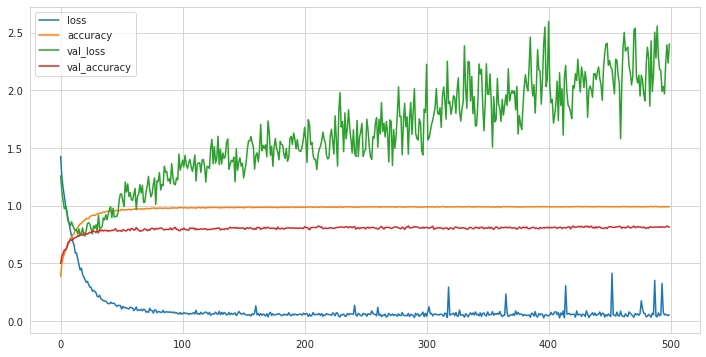

In [140]:
plotHistory(model_4_history)

# Model Evaluation

In [141]:
test_loss, test_acc  = model_4.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",test_loss)
print("\nThe Best test Accuracy is :",test_acc*100)

6/6 [==============================] - 0s 4ms/step - loss: 2.6947 - accuracy: 0.7841
The test Loss is : 2.6946616172790527

The Best test Accuracy is : 78.41079235076904


In [142]:
%%time
pred_acc = model_4.predict(X_test)

21/21 [==============================] - 0s 1ms/step
CPU times: user 130 ms, sys: 11.5 ms, total: 142 ms
Wall time: 121 ms


In [143]:
%%time
y_prob = model_4.predict(X_test) 
pred_labels = y_prob.argmax(axis=-1)

21/21 [==============================] - 0s 1ms/step
CPU times: user 98.1 ms, sys: 4.31 ms, total: 102 ms
Wall time: 83 ms


In [144]:
#print(len(pred_labels))
# i = 0      # test song
# display(X_test.iloc[i])
# index_label[pred_labels[i]]

In [37]:
%%time

########### TEST DATA #################


gtzan_new_test_df = pd.read_csv("../myelin_features.csv")

song_name_df = gtzan_new_test_df.iloc[:, :2]
song_name_df
true_labels = gt_labels
# true_labels

gtzan_new_test_df = gtzan_new_test_df.iloc[:, 2:-2]

# gtzan_new_test_df
#print(gtzan_new_test_df.iloc[:, :])

gtzan_new_test_df = pd.DataFrame(scaler.transform(gtzan_new_test_df), columns=gtzan_new_test_df.columns)

#print(gtzan_new_test_df.iloc[0, :])

y_prob = model_3.predict(X_test)
pred_labels = y_prob.argmax(axis=-1)

count = 0

for i in range(1, len(pred_labels) + 1):
    if true_labels.iloc[i-1,0] == index_label[pred_labels[i-1]]:
        count+=1
print(count)
print(count/len(true_labels))

for i in range(1, len(pred_labels)+1):
    print(i, index_label[pred_labels[i-1]], "------------", true_labels.iloc[i-1, 0] , "-----", song_name_df.iloc[i-1,1])

21/21 [==============================] - 0s 871us/step


AttributeError: 'list' object has no attribute 'iloc'

In [146]:
# a = gtzan_new_test_df.to_numpy()

In [43]:
# a = a.astype(np.float32)

In [44]:
#y_prob = model_1.predict(gtzan_new_test_df)
#print(y_prob)

In [45]:
# model_4.layers[-2].output

In [46]:
# m = tf.keras.Model(inputs=model_4.inputs,outputs=model_4.layers[-2].output)

In [47]:
# m.predict(gtzan_new_test_df)

In [48]:
# m.predict(X_test)

In [95]:
pred = []

y_prob = model_3.predict(X_test)
pred_labels = y_prob.argmax(axis=-1)
for pred_lab in pred_labels:
    pred.append(index_label[pred_lab])
pred

21/21 [==============================] - 0s 1ms/step


['english',
 'english',
 'bengali',
 'malayalam',
 'malayalam',
 'telugu',
 'marathi',
 'kannada',
 'telugu',
 'kannada',
 'english',
 'english',
 'telugu',
 'telugu',
 'telugu',
 'malayalam',
 'tamil',
 'kannada',
 'marathi',
 'tamil',
 'bengali',
 'kannada',
 'kannada',
 'hindi',
 'bengali',
 'kannada',
 'malayalam',
 'english',
 'hindi',
 'bengali',
 'hindi',
 'bengali',
 'english',
 'tamil',
 'english',
 'marathi',
 'hindi',
 'tamil',
 'telugu',
 'bengali',
 'hindi',
 'bengali',
 'malayalam',
 'telugu',
 'tamil',
 'hindi',
 'english',
 'kannada',
 'malayalam',
 'english',
 'malayalam',
 'english',
 'telugu',
 'hindi',
 'english',
 'tamil',
 'bengali',
 'english',
 'malayalam',
 'tamil',
 'tamil',
 'kannada',
 'english',
 'bengali',
 'kannada',
 'hindi',
 'bengali',
 'malayalam',
 'tamil',
 'kannada',
 'hindi',
 'hindi',
 'marathi',
 'hindi',
 'bengali',
 'hindi',
 'english',
 'kannada',
 'english',
 'kannada',
 'tamil',
 'english',
 'bengali',
 'malayalam',
 'tamil',
 'tamil',
 'ma

In [81]:
gt_labels = []
for zz in y_test:
    gt_labels.append(index_label[zz])

gt_labels

['english',
 'english',
 'bengali',
 'malayalam',
 'malayalam',
 'telugu',
 'marathi',
 'kannada',
 'telugu',
 'kannada',
 'english',
 'english',
 'telugu',
 'tamil',
 'telugu',
 'malayalam',
 'tamil',
 'kannada',
 'marathi',
 'telugu',
 'bengali',
 'tamil',
 'kannada',
 'hindi',
 'bengali',
 'kannada',
 'malayalam',
 'english',
 'english',
 'hindi',
 'bengali',
 'bengali',
 'english',
 'tamil',
 'english',
 'marathi',
 'hindi',
 'tamil',
 'malayalam',
 'bengali',
 'hindi',
 'marathi',
 'malayalam',
 'telugu',
 'tamil',
 'hindi',
 'kannada',
 'kannada',
 'tamil',
 'english',
 'malayalam',
 'english',
 'telugu',
 'hindi',
 'english',
 'tamil',
 'bengali',
 'english',
 'malayalam',
 'malayalam',
 'tamil',
 'kannada',
 'english',
 'marathi',
 'marathi',
 'hindi',
 'bengali',
 'malayalam',
 'telugu',
 'kannada',
 'bengali',
 'hindi',
 'hindi',
 'hindi',
 'marathi',
 'hindi',
 'kannada',
 'kannada',
 'english',
 'kannada',
 'tamil',
 'english',
 'bengali',
 'tamil',
 'tamil',
 'tamil',
 'hi

In [82]:
count1 = 0
for i in range(len(pred)):
    if (gt_labels[i] == pred[i]):
        count1 +=1 

print(count1/len(pred))
    

0.7946026986506747


In [96]:
model_3.save("v1_language_model.h5")

In [92]:
# def pred(path,model,index_label):
#     new_test_df = pd.read_csv(path)

#     song_name_df = new_test_df.iloc[:, :2]

#     new_test_df = new_test_df.iloc[:, 2:]

#     #print(gtzan_new_test_df.iloc[:, :])

# #     new_test_df = pd.DataFrame(scaler.transform(new_test_df), columns=new_test_df.columns)

#     #print(gtzan_new_test_df.iloc[0, :])

#     y_prob = model.predict(new_test_df)
#     pred_labels = y_prob.argmax(axis=-1)

#     for i in range(1, len(pred_labels)+1):
#         print(i, index_label[pred_labels[i-1]], "------------", song_name_df.iloc[i-1,1])